# Reinforcement Learning

## 动态编程和策略迭代

In [13]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
import random

In [14]:
gamma = 1
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize - 1, gridSize - 1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 1000

In [15]:
def actionRewardFunction(initialPosition, action):
    if initialPosition in terminationStates:
        return initialPosition, 0
    reward = rewardSize
    finalPosition = np.array(initialPosition) + np.array(action)
    if -1 in finalPosition or 4 in finalPosition:
        finalPosition = initialPosition
    return finalPosition, reward

In [16]:
valueMap = np.zeros((gridSize, gridSize))
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [17]:
valueMap


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [18]:
deltas = []
for it in range(numIterations):
    copyValueMap = np.copy(valueMap)
    deltaState = []
    for state in states:
        weightedRewards = 0
        for action in actions:
            finalPosition, reward = actionRewardFunction(state, action)
            weightedRewards += (1/len(actions))*(reward+(gamma*valueMap[finalPosition[0], finalPosition[1]]))
        deltaState.append(np.abs(copyValueMap[state[0], state[1]]-weightedRewards))
        copyValueMap[state[0], state[1]] = weightedRewards
    deltas.append(deltaState)
    valueMap = copyValueMap
    if it in [0,1,2,9, 99, numIterations-1]:
        print("Iteration {}".format(it+1))
        print(valueMap)
        print("")

Iteration 1
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]

Iteration 2
[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -1.75]
 [-2.   -2.   -1.75  0.  ]]

Iteration 3
[[ 0.     -2.4375 -2.9375 -3.    ]
 [-2.4375 -2.875  -3.     -2.9375]
 [-2.9375 -3.     -2.875  -2.4375]
 [-3.     -2.9375 -2.4375  0.    ]]

Iteration 10
[[ 0.         -6.13796997 -8.35235596 -8.96731567]
 [-6.13796997 -7.73739624 -8.42782593 -8.35235596]
 [-8.35235596 -8.42782593 -7.73739624 -6.13796997]
 [-8.96731567 -8.35235596 -6.13796997  0.        ]]

Iteration 100
[[  0.         -13.94260509 -19.91495107 -21.90482522]
 [-13.94260509 -17.92507693 -19.91551999 -19.91495107]
 [-19.91495107 -19.91551999 -17.92507693 -13.94260509]
 [-21.90482522 -19.91495107 -13.94260509   0.        ]]

Iteration 1000
[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]



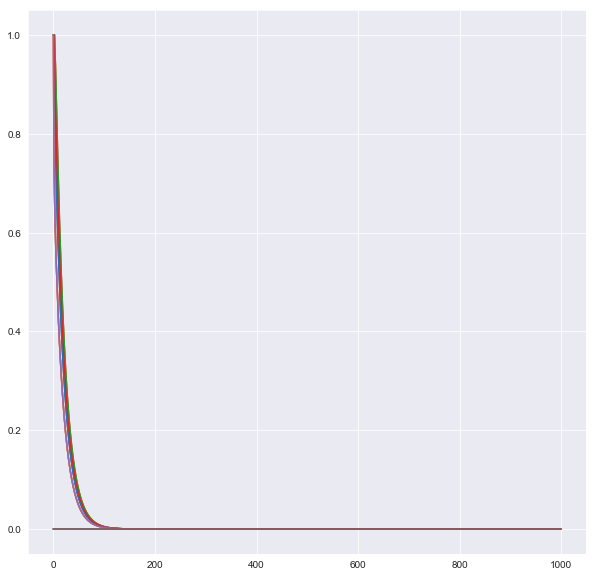

In [19]:
plt.figure(figsize=(10,10))
plt.plot(deltas)

## 蒙特卡罗方法

In [22]:
gamma = 0.6
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize - 1, gridSize - 1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000

In [24]:
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [25]:
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action,rewardSize, list(finalState)])
        initState = finalState

In [26]:
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    
    #print(episode)
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue

100%|██████████| 10000/10000 [00:08<00:00, 1225.78it/s]


In [28]:
V

array([[ 0.        , -1.65299415, -2.2176915 , -2.38079094],
       [-1.64173311, -2.10741875, -2.27938867, -2.22071507],
       [-2.22742419, -2.27920473, -2.1011517 , -1.64598567],
       [-2.38089798, -2.20615081, -1.62057244,  0.        ]])

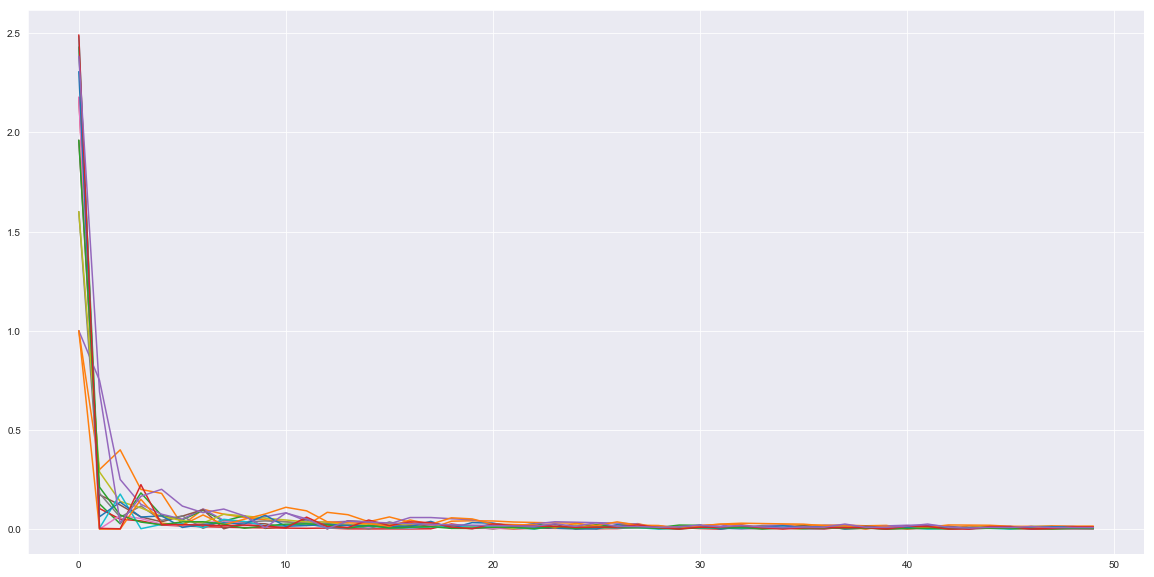

In [29]:
# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

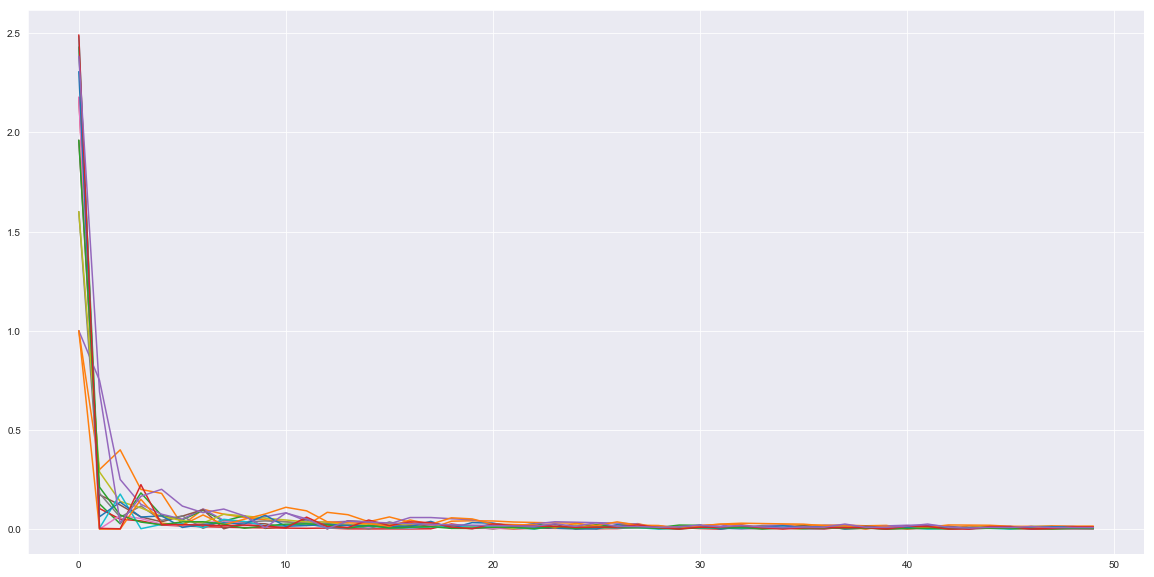

In [30]:
# using gamma = 0.6
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] 
for x in deltas.values()]
for series in all_series:
    plt.plot(series)

## 时间差异式学习

In [44]:
gamma = 0.5
 
# 折现率
rewardSize = -1
gridSize = 4
alpha = 0.5
 
# (0,1] // stepSize 步长
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000

In [45]:
# 初始化
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [46]:
# utils
def generateInitialState():
    initState = random.choice(states[1:-1])
    return initState

def generateNextAction():
    return random.choice(actions)

def takeAction(state, action):
    if list(state) in terminationStates:
        return 0, None
    finalState = np.array(state)+np.array(action)
    # if robot crosses wall
    if -1 in list(finalState) or gridSize in list(finalState):
        finalState = state
    return rewardSize, list(finalState)

In [47]:
for it in tqdm(range(numIterations)):
    state = generateInitialState()
    while True:
        action = generateNextAction()
        reward, finalState = takeAction(state, action)
        # 我们到了终点
        if finalState is None:
            break
        # 修改 Value 函数
        before =  V[state[0], state[1]]
        V[state[0], state[1]] += alpha*(reward + gamma*V[finalState[0], finalState[1]] - V[state[0], state[1]])
        deltas[state[0], state[1]].append(float(np.abs(before-V[state[0], state[1]])))
        state = finalState

100%|██████████| 10000/10000 [00:02<00:00, 4408.89it/s]


In [48]:
V

array([[ 0.        , -1.20512655, -1.81258884, -1.97486952],
       [-1.45348592, -1.84013519, -1.9892403 , -1.98249593],
       [-1.9658464 , -1.98500093, -1.97313153, -1.47419437],
       [-1.98988781, -1.98210134, -1.82733484,  0.        ]])

### 使用gamma = 0.1 alpha = 0.1 收敛

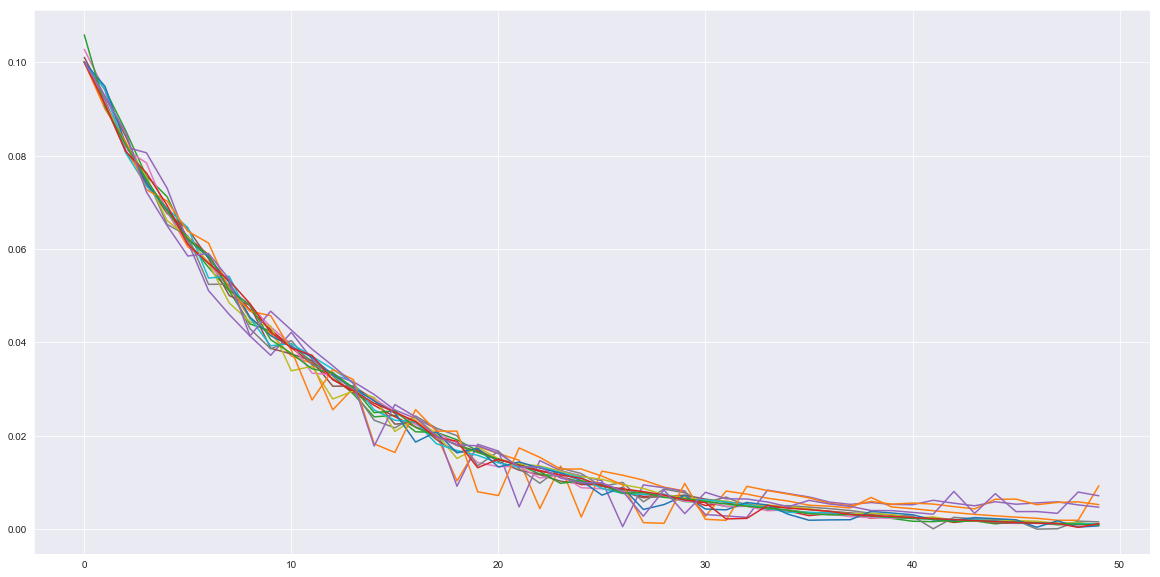

In [43]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

### 使用gamma = 0.5 alpha = 0.5 不收敛

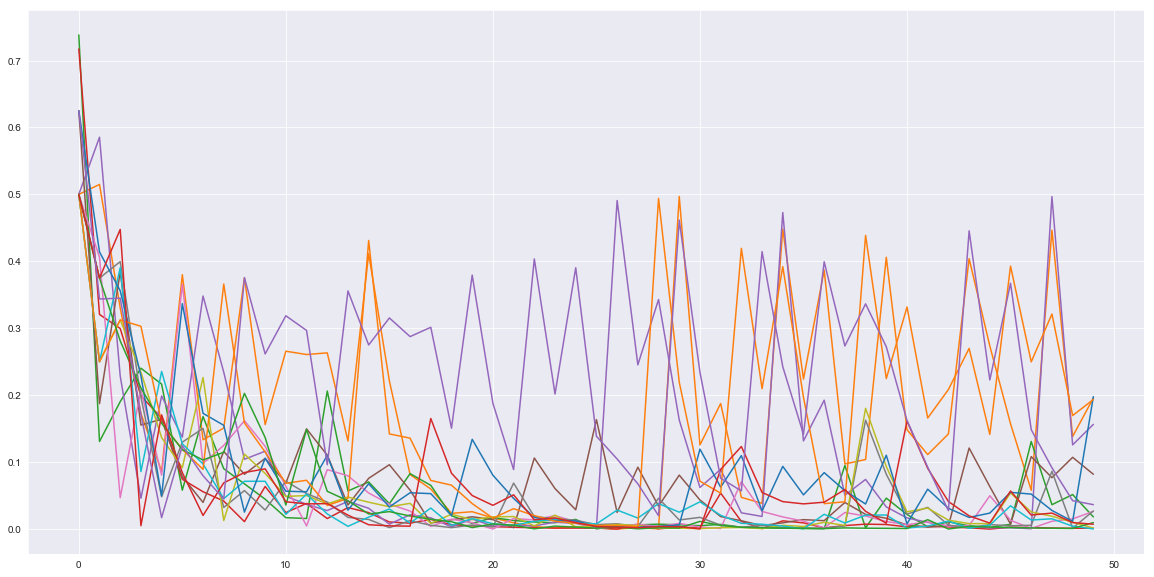

In [49]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)